In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import confusion_matrix


# **Decision Tree**

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/week6/pima-indians-diabetes.csv')
print(dataset.head())
print("\n")
print(dataset[['pregNo', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age']].describe())


   pregNo  glucose  bp  skin  insulin   bmi  pedigree  age  class
0       6      148  72    35        0  33.6     0.627   50      1
1       1       85  66    29        0  26.6     0.351   31      0
2       8      183  64     0        0  23.3     0.672   32      1
3       1       89  66    23       94  28.1     0.167   21      0
4       0      137  40    35      168  43.1     2.288   33      1


           pregNo     glucose          bp        skin     insulin         bmi  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     3.845052  120.894531   69.105469   20.536458   79.799479   31.992578   
std      3.369578   31.972618   19.355807   15.952218  115.244002    7.884160   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000   99.000000   62.000000    0.000000    0.000000   27.300000   
50%      3.000000  117.000000   72.000000   23.000000   30.500000   32.000000   
75%      6.000000  140.250000   80.

##**Train, Test, Split**

**Import train_test_split**: Import the function from the scikit-learn library.

We have a list of features X and corresponding labels y.

**Split the Data**: Use *train_test_split* to split the data into **training** and **testing** sets. The test_size parameter specifies the proportion of the dataset to include in the test split. The random_state parameter ensures reproducibility.

**Result**: The function returns four sets: *X_train, X_test, y_train, and y_test*. *X_train and y_train* are the training sets, *while X_test and y_test* are the testing sets.

**Now, you can use X_train and y_train to train your machine learning model and evaluate its performance on the unseen data using X_test and y_test. This helps assess how well the model generalizes to new, unseen examples**.

In [ ]:
#Read in the dataset and display
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/week6/pima-indians-diabetes.csv')
# print(dataset.head())

#Feature selection: split the dataset into features (independent variables) and target (dependent variable)
feature_cols = ['pregNo', 'glucose', 'bp', 'insulin','bmi','pedigree', 'age']
X = dataset[feature_cols] # Features
Y = dataset['class'] # Target variable

#Function for split dataset will have 3 parameters: features, target, test_set size
# Split dataset into training set and test set, random_state = how data is shuffled b4 splitting
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1) # 70% training and 30% test

#Build Decision Tree Model using Scikit Learn
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

#Evaluate the accuracy of the model (or classifier) for prediction
# Model Accuracy, how often is the classifier correct?
# The Accuracy score is calculated by dividing the number of correct predictions
# by the total prediction number
print("Accuracy for 70% training set and 30% test set :",
          metrics.accuracy_score(y_test, y_pred))
print("\n")

Accuracy for 70% training set and 30% test set : 0.6926406926406926




###**Confusion Matrix**

In [ ]:
#Read in the dataset and display
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/week6/pima-indians-diabetes.csv')
print(dataset.head())

#Feature selection: split the dataset into features (independent variables) and target (dependent variable)
feature_cols = ['pregNo', 'glucose', 'bp', 'insulin','bmi','pedigree', 'age']
X = dataset[feature_cols] # Features
Y = dataset['class'] # Target variable

#Function for split dataset will have 3 parameters: features, target, test_set size
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1) # 70% training and 30% test


#Build Decision Tree Model using Scikit Learn
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)


#Evaluate the accuracy of the model (or classifier) for prediction
# Model Accuracy, how often is the classifier correct?
print("\n")
print("Accuracy for 70% training set and 30% test set :",
          metrics.accuracy_score(y_test, y_pred)) # accuracy_score() - (TN + TP)/(TN + FN + FP + TP)
# precison_score(y_test, y_pred) # tp/(tp + fp) - Ability of the classifier not to label as positive a sample that is negative
# recall_score(y_test, y_pred) # tp/(tp + fn) - Ability of the classifier to find all the positive samples
# f1_score(y_test, y_pred) # (precision * recall)/(precision + recall) - Harmonic mean of the precision and recall

#How to improve the accuracy of the model? By tuning the number of features for the model
#Confusion matrix
print("\n")
print(confusion_matrix(y_test, y_pred))
print("\n")

cm = confusion_matrix(y_test, y_pred)
tn = cm[0][0]
fn = cm[1][0]
tp = cm[1][1]
fp = cm[0][1]

print("true negative: ", tn)
print("false negative: ", fn)
print("true positive: ", tp)
print("false positive: ", fp)


   pregNo  glucose  bp  skin  insulin   bmi  pedigree  age  class
0       6      148  72    35        0  33.6     0.627   50      1
1       1       85  66    29        0  26.6     0.351   31      0
2       8      183  64     0        0  23.3     0.672   32      1
3       1       89  66    23       94  28.1     0.167   21      0
4       0      137  40    35      168  43.1     2.288   33      1


Accuracy for 70% training set and 30% test set : 0.683982683982684


[[114  32]
 [ 41  44]]


true negative:  114
false negative:  41
true positive:  44
false positive:  32


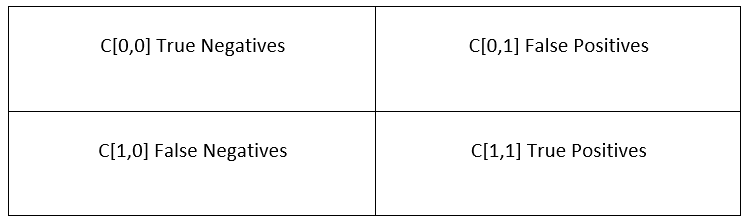

##**Tree Plotting**

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
iris = load_iris()
decision_tree = DecisionTreeClassifier(random_state=0, max_depth=2)
decision_tree = decision_tree.fit(iris.data, iris.target)
r = export_text(decision_tree, feature_names=iris['feature_names'])
print(r)


|--- petal width (cm) <= 0.80
|   |--- class: 0
|--- petal width (cm) >  0.80
|   |--- petal width (cm) <= 1.75
|   |   |--- class: 1
|   |--- petal width (cm) >  1.75
|   |   |--- class: 2



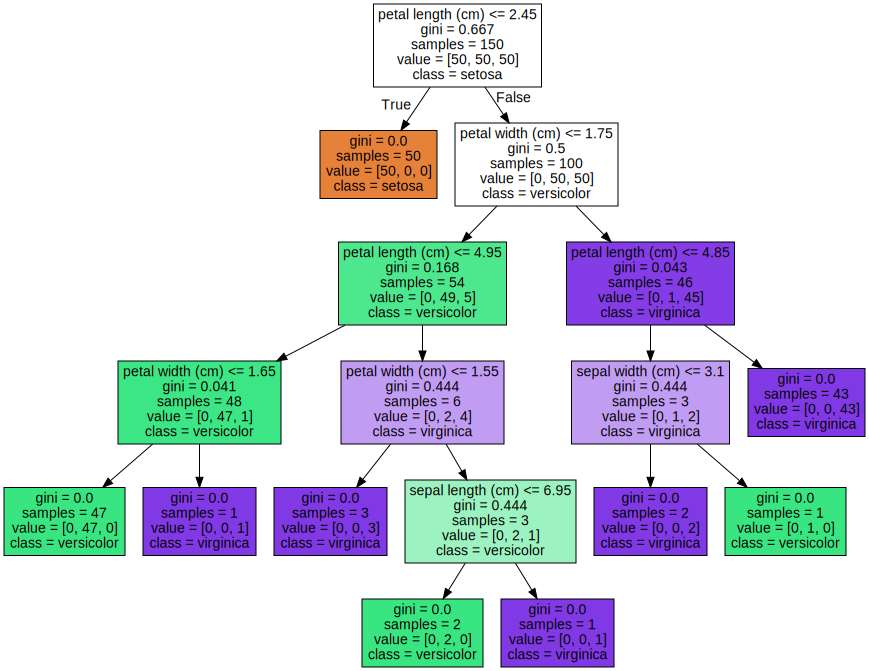

<Figure size 1500x1000 with 0 Axes>

In [ ]:
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz

# Prepare the data data
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Fit the classifier with default hyper-parameters
clf = DecisionTreeClassifier(random_state=1234)
model = clf.fit(X, y)

text_representation = tree.export_text(clf)
# print(text_representation)

fig = plt.figure(figsize=(15,10))
# tree.plot_tree(clf, feature_names=iris.feature_names,
#                    class_names=iris.target_names,
#                    filled=True)
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=iris.feature_names,
                                class_names=iris.target_names,
                                filled=True)
graph = graphviz.Source(dot_data, format="png")
graph


##**Decision Tree Regression**

####**Regression Analysis is a statistical method used to examine the relationship between one Dependent Variable (Traget Variable) and one or more Independent Variables (Feature Variable(s))**

####**Without Spliting the dataset**

In [ ]:
from sklearn import tree
X = [[0, 0], [2, 2]]
y = [0.5, 2.5]
clf = tree.DecisionTreeRegressor() # builds a decision tree model that predicts the target variable based on input features
clf = clf.fit(X, y)
clf.predict([[1, 1]])


array([0.5])

In [ ]:
from sklearn.tree import DecisionTreeRegressor
import numpy as np

# Create some sample data
X = np.array([[1], [2], [3], [4], [5]])
y = np.array([2, 4, 1, 3, 5])

# Initialize the DecisionTreeRegressor
regressor = DecisionTreeRegressor()

# Fit the model to the data
regressor.fit(X, y)

# Make predictions
predictions = regressor.predict([[2.5]])

# Print the result
print("Prediction for input [2.5]:", predictions)


Prediction for input [2.5]: [4.]


###**Decision Tree Regression Plotting**

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


Prediction for input [6.5]: [150000.]




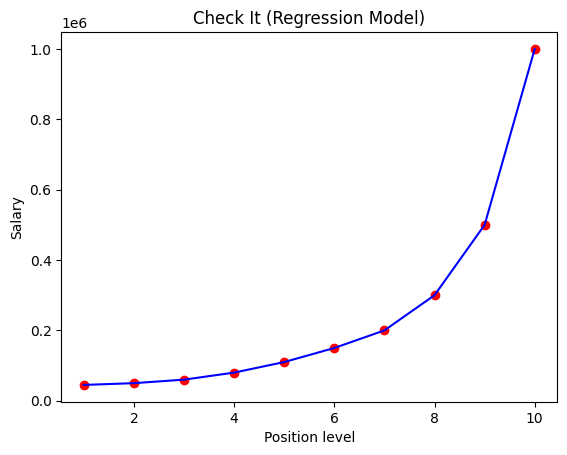

In [ ]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
%matplotlib inline

#importing the dataset
dataset=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/week6/position_salaries.csv')

#Dataset's column begin with 0, 1,2
#dataset.iloc[:,1:2] gives you a 2-d dataframe (columns from 1 to 2)
#dataset.iloc[:,1] gives you a pandas series (1-d) (from column 1).
X=dataset.iloc[:,[1]].values # dataframe
y=dataset.iloc[:,2].values # series
z=dataset.iloc[:,1].values
a=dataset.iloc[:,0].values

print(X)
print("\n")
print(y)
# print("\n")
# print(z)
# print("\n")
# print(a)
print("\n")

#fitting the decision tree regression model to the dataset
regressor=DecisionTreeRegressor(random_state=0)
regressor.fit(X,y)

y_pred = regressor.predict([[6.5]])
print("Prediction for input [6.5]:",y_pred)
print("\n")

# Visualising the Decision Tree Regression results
plt.scatter(X, y, color = 'red')
plt.plot(X, regressor.predict(X), color = 'blue')
plt.title('Check It (Regression Model)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()


768
768




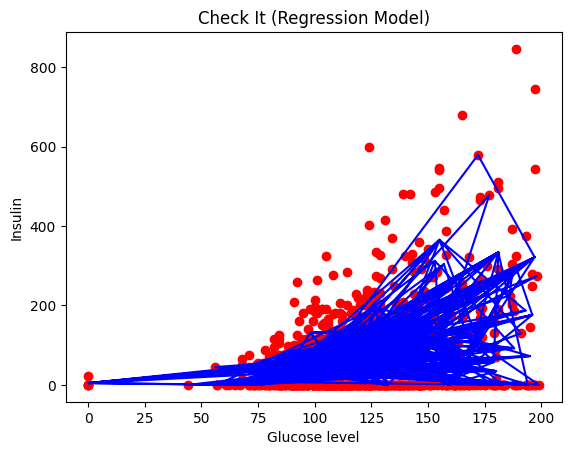

In [ ]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
%matplotlib inline

#importing the dataset
dataset=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/week6/pima-indians-diabetes.csv')

#more explanation https://pandas.pydata.org/pandas-#docs/stable/reference/api/pandas.DataFrame.iloc.html
#https://www.shanelynn.ie/select-pandas-dataframe-rows-and-columns-using-iloc-loc-and-#ix/
#Dataset's column begin with 0, 1,2
#dataset.iloc[:,[1]] gives you a 1-d dataframe (column 1)
#dataset.iloc[:,1] gives you a pandas series (1-d) (from column 1).
X=dataset.iloc[:,[1]].values # dataframe
y=dataset.iloc[:,4].values # series


# print(X)
# print("\n")
# print(y)
# print("\n")

print(dataset['glucose'].count())
print(dataset['insulin'].count())
#print(y.count())
print("\n")

#fitting the decision tree regression model to the dataset without splitting the dataset
regressor=DecisionTreeRegressor(random_state=0)
regressor.fit(X,y)

# Visualising the Decision Tree Regression results
plt.scatter(X, y, color = 'red')
plt.plot(X, regressor.predict(X), color = 'blue')
plt.title('Check It (Regression Model)')
plt.xlabel('Glucose level')
plt.ylabel('Insulin')
plt.show()


####**Spliting the dataset**



The root mean square error is:  152.14318314937856




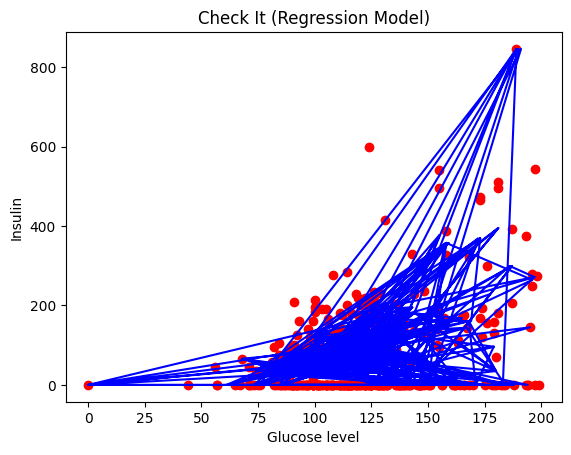

In [ ]:
#adapted from https://heartbeat.fritz.ai/implementing-regression-using-a-decision-tree-#and-scikit-learn-ac98552b43d7
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_squared_error
import seaborn as sns

#load the dataset
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/week6/pima-indians-diabetes.csv')
# dataset.head()

#split train and test dataset
X = dataset['glucose']
y = dataset['insulin']
X = X.values.reshape(-1, 1) # single feature or array
y = y.values.reshape(-1, 1)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=42)

#Fit x_train and y-train into the regression model
#fitting the decision tree regression model to the dataset without splitting the dataset
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(x_train,y_train)

#Obtain predicted y values (i.e. insulin) based on x test values
y_pred = regressor.predict(x_test)
# print(y_pred)

# Model evaluation
# we evaluate our model by finding the root mean squared error produced by the model.
# use numpy np.sqrt
mse = mean_squared_error(y_test, y_pred) # measures how close a regression line is to a set of data points
rmse = np.sqrt(mse)
print("\n")
print("The root mean square error is: ", rmse)
print("\n")

#5 Visualising the Decision Tree Regression results based on x_train and y_train
plt.scatter(x_train, y_train, color = 'red')
plt.plot(x_test, regressor.predict(x_test), color = 'blue')
plt.title('Check It (Regression Model)')
plt.xlabel('Glucose level')
plt.ylabel('Insulin')
plt.show()
